In [1]:
import matplotlib.pyplot as plt
import scipy.optimize as fit
import scipy.signal as sg
import scipy.fft as ft
import numpy as np

In [8]:
N = 1000               # time range (sec)
dt = 1.0               # time interval (sec)

amp = 1.0              # amplitude
freq = 0.1             # frequency
period = 1./freq       # period
omega = 2.*np.pi*freq  # ang freq
phi = 0.0              # phase

print("amp = ", amp, ", period = ", period)

amp =  1.0 , period =  10.0


11 [0.        0.0954915 0.3454915 0.6545085 0.9045085 1.        0.9045085
 0.6545085 0.3454915 0.0954915 0.       ] 5.000000000000001


<ipython-input-11-464c4e73718a>:11: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  win = sg.hamming(nwin) # hamming function window
<ipython-input-11-464c4e73718a>:12: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  win = sg.hann(nwin) # hann function window


Text(0, 0.5, 'ampl.')

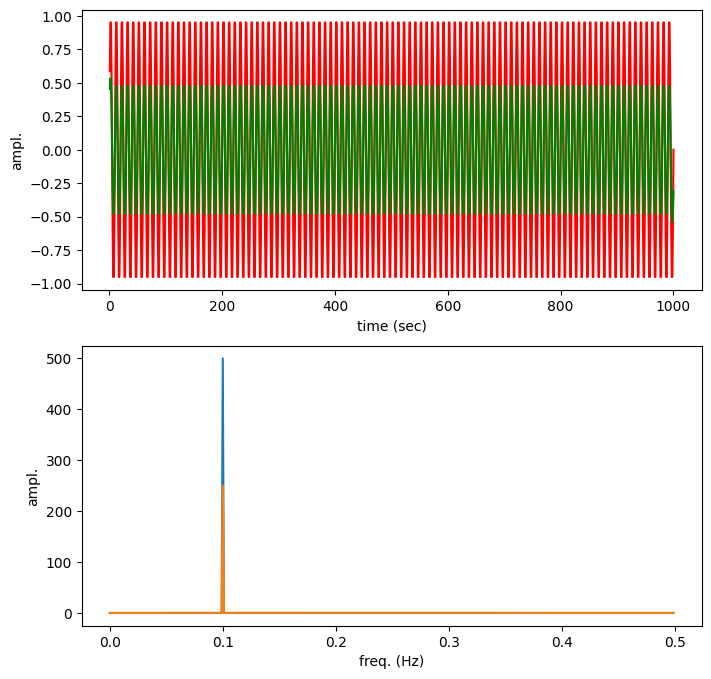

In [11]:
ti = np.linspace( 1, N, num = N, dtype = int )

xi = np.zeros( (N), dtype=float)      # input signal (time domain)
xi = amp*np.sin(omega*ti+phi)

fxi = ft.fft(xi)[0:N//2]              # input signal (freq. domain)
faxis = ft.fftfreq(N,1)[0:N//2]

nwin = 11 # window length
win = np.repeat( [1], nwin) # repeat array [1] nwin times to build window
win = sg.hamming(nwin) # hamming function window
win = sg.hann(nwin) # hann function window
print( nwin, win, np.sum(win))

yi = sg.convolve( xi, win,  mode='same') / np.sum(win)
fyi = ft.fft(yi)[0:N//2]

fig,axes = plt.subplots(2,1,figsize = (8,8))

axes[0].plot(ti,xi,'r')
axes[0].plot(ti,yi,'g')
axes[0].set_xlabel("time (sec)")
axes[0].set_ylabel("ampl.")

axes[1].plot(faxis,np.abs(fxi))
axes[1].plot(faxis,np.abs(fyi))
axes[1].set_xlabel("freq. (Hz)")
axes[1].set_ylabel("ampl.")


<ipython-input-14-be019736511c>:22: DeprecationWarning: Importing hamming from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hamming' or the convenience function 'scipy.signal.get_window' instead.
  win = sg.hamming(iw*Wstep+Wmin) # hamming function window
<ipython-input-14-be019736511c>:23: DeprecationWarning: Importing hann from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.hann' or the convenience function 'scipy.signal.get_window' instead.
  win = sg.hann(iw*Wstep+Wmin) # hann function window


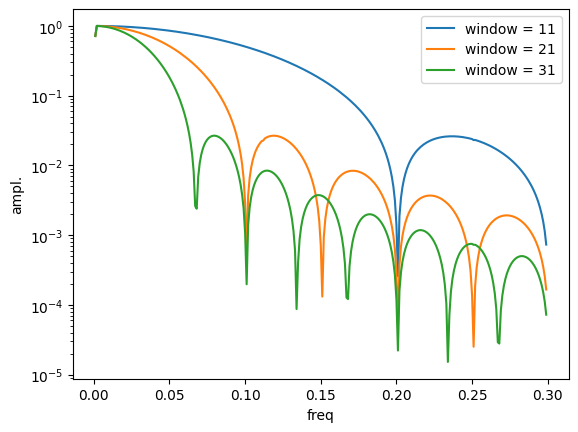

In [14]:
Nw = 3                 # number of window steps
Wmin = 11              # min window width
Wstep = 10             # window step size

Nf = 299               # number of freq. steps (keep f_max < f_nyquist = f_bin/2)
fmin = 0.001           # min freq.
fstep = 0.001          # freq. step

xi = np.zeros( (N), dtype=float) # initialize input signal array
xlo,xhi = 200,800 # bookending for find gain with amax() of array

freq = np.zeros( (Nf), dtype=float) # array to store freqs
gain = np.zeros( (Nf), dtype=float) # array to store gains

for iw in range(Nw): # loop over rolling windows

  for ifr in range(Nf): # loop over signal frequencies

      xi = amp*np.sin((2.*np.pi*ifr*fstep+fmin)*ti+phi) # generate inout signal

      win = np.repeat( [1], iw*Wstep+Wmin) # rolling-average window
      win = sg.hamming(iw*Wstep+Wmin) # hamming function window
      win = sg.hann(iw*Wstep+Wmin) # hann function window

      yi = sg.convolve( xi, win, mode='same') / np.sum(win) # generate output yi from input xi by window convolution
      freq[ifr] = ifr*fstep+fmin # store gain
      gain[ifr] = np.amax(yi[xlo:xhi]) # store freq.


  plt.plot( freq, gain,label=f"window = {iw*Wstep+Wmin}")

plt.xlabel("freq")
plt.ylabel("ampl.")
plt.yscale("log")
plt.legend()

#plt.plot( ti, xi, 'g-')

Text(0, 0.5, 'in / out signal')

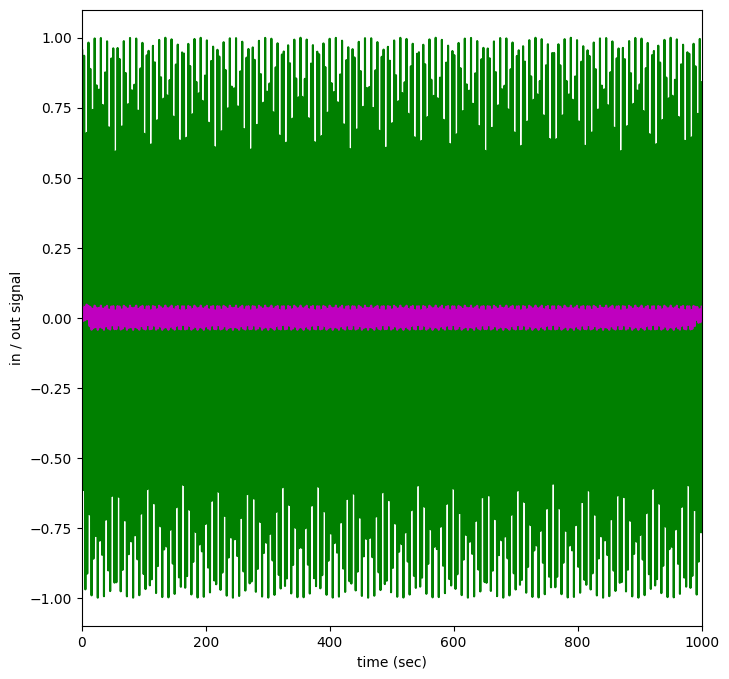

In [5]:
#sandbox 1
Nex = 21                                         # compare Nex = 1, 3, 11 (odd numbers!)
win = np.repeat([1],Nex) / Nex                  # builds array repeats (arg 2) of array (arg 1)  ( note / iw for average)
yi = sg.convolve( xi, win, mode = "same")       # convolutes array 1 (arg1) with array (arg 2)

fig,axes = plt.subplots(1,1,figsize = (8,8))

axes.plot( ti, xi, 'g-')
axes.plot( ti, yi, 'm-')
axes.set_xlim(0,1000)
axes.set_xlabel("time (sec)")
axes.set_ylabel("in / out signal")

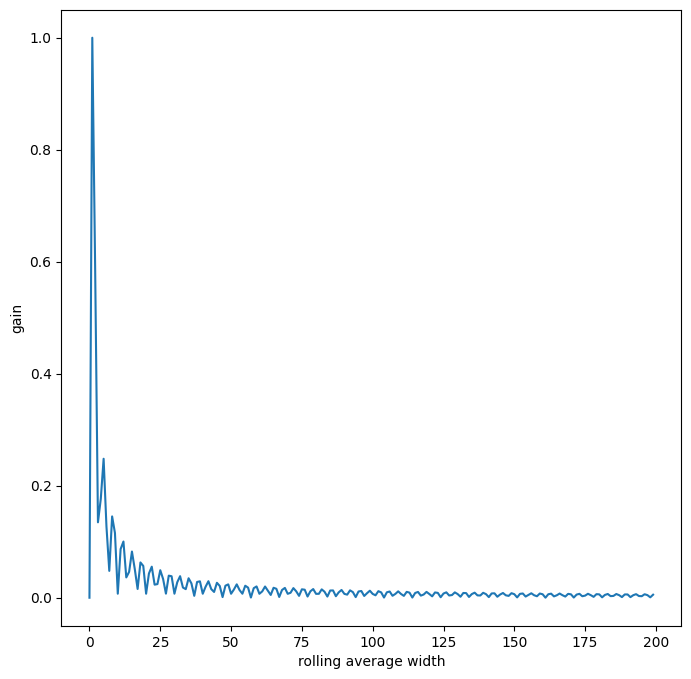

In [6]:
#sandbox 2
Nw = 200                                        # study filter gain versus rolling average width

gain = np.zeros( (Nw), dtype=float)             # declare arrays for gain versus width
wdth = np.zeros( (Nw), dtype=float)

for iw in range(1,Nw):                            # loop over rolling windows of lengths 1 - N
    win = np.repeat([1],iw) / iw                  # builds array repeats (arg 2) of array (arg 1) ( note / iw for average)
    yiw = sg.convolve( xi, win, mode="same")      # convolutes array 1 (arg1) with array (arg 2)
    gain[iw] = np.amax(yiw[250:750])              # compute amplitude of output signal versus iw
    wdth[iw] = iw

fig,axes = plt.subplots(1,1,figsize = (8,8))

axes.set_xlabel("rolling average width")
axes.set_ylabel("gain")
axes.plot( wdth, gain)